In [ ]:
# 참조 : https://github.com/AlexeyAB/darknet

# 1. GPU Setup

# 2. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 3. Install CUDA related modules, cuDNN

cuDNN download URL : https://developer.nvidia.com/rdp/cudnn-download

Unzip the cuDNN from Google Drive to Colab /usr/local/

In [ ]:
# Colab에 설치되어 있는 CUDA 버전 확인
! /usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# 구글 드라이브에 Darknet 폴더와 cuDNN 을 저장해 둘 폴더 생성
import os
if not os.path.exists('/content/gdrive/My Drive/darknet/cuDNN'):
  os.makedirs('/content/gdrive/My Drive/darknet/cuDNN')

#  CUDA 버전에 맞는 cuDNN을 다운받아 구글 드라이브(darknet/cuDNN/)에 복사한다.

In [ ]:
# Colab에 설치되어 있는 CUDA 버전에 맞는 cuDNN을 구글 드라이브로부터 압축 해제해서 /usr/local/으로 복사 
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-11.0-linux-x64-v8.0.5.39.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

cuda/include/cudnn.h
cuda/include/cudnn_adv_infer.h
cuda/include/cudnn_adv_train.h
cuda/include/cudnn_backend.h
cuda/include/cudnn_cnn_infer.h
cuda/include/cudnn_cnn_train.h
cuda/include/cudnn_ops_infer.h
cuda/include/cudnn_ops_train.h
cuda/include/cudnn_version.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.8
cuda/lib64/libcudnn.so.8.0.5
cuda/lib64/libcudnn_adv_infer.so
cuda/lib64/libcudnn_adv_infer.so.8
cuda/lib64/libcudnn_adv_infer.so.8.0.5
cuda/lib64/libcudnn_adv_train.so
cuda/lib64/libcudnn_adv_train.so.8
cuda/lib64/libcudnn_adv_train.so.8.0.5
cuda/lib64/libcudnn_cnn_infer.so
cuda/lib64/libcudnn_cnn_infer.so.8
cuda/lib64/libcudnn_cnn_infer.so.8.0.5
cuda/lib64/libcudnn_cnn_train.so
cuda/lib64/libcudnn_cnn_train.so.8
cuda/lib64/libcudnn_cnn_train.so.8.0.5
cuda/lib64/libcudnn_ops_infer.so
cuda/lib64/libcudnn_ops_infer.so.8
cuda/lib64/libcudnn_ops_infer.so.8.0.5
cuda/lib64/libcudnn_ops_train.so
cuda/lib64/libcudnn_ops_train.so.8
cuda/lib64/libcudnn_o

In [ ]:
# cuDNN 버전 확인
!cat /usr/local/cuda/include/cudnn_version.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 8
#define CUDNN_MINOR 0
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#endif /* CUDNN_VERSION_H */


# 4. install DarkNet(Base System) 

Darknet install URL : https://pjreddie.com/darknet/install/ 

위의 Install URL을 사용하지 않고, Github 에 있는 https://github.com/AlexeyAB/darknet.git 을 사용함

In [ ]:
# darknet 다운로드
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14997, done.
remote: Total 14997 (delta 0), reused 0 (delta 0), pack-reused 14997
Receiving objects: 100% (14997/14997), 13.38 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (10194/10194), done.
/content/darknet


In [ ]:
!ls

3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


In [ ]:
# Makefile 변경
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
# Compile DarkNet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
%ls

3rdparty/               darknet.py              net_cam_v4.sh*
backup/                 darknet_video.py        obj/
build/                  data/                   README.md
build.ps1*              image_yolov3.sh*        results/
cfg/                    image_yolov4.sh*        scripts/
cmake/                  include/                src/
CMakeLists.txt          json_mjpeg_streams.sh*  vcpkg.json
darknet*                LICENSE                 video_yolov3.sh*
DarknetConfig.cmake.in  Makefile                video_yolov4.sh*
darknet_images.py       net_cam_v3.sh*


In [ ]:
# 컴파일된 실행파일(./darknet)을 구글 드라이브에 저장해 둘 폴더(darknet/bin/) 생성
import os
if not os.path.exists('/content/gdrive/My Drive/darknet/bin'):
  os.makedirs('/content/gdrive/My Drive/darknet/bin')

In [ ]:
# 컴파일된 실행파일(./darknet)을 구글 드라이브로 복사
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

In [ ]:
# Use compiled darknet in your Google Drive after the first compile
# 1.Makes a darknet directory
# !mkdir darknet
# %cd darknet

# 2.Copy the Darknet compiled version to the VM
# !cp /content/gdrive/My\ Drive/darknet/bin/darknet ./darknet 

# 3.Set execution permissions
# !chmod +x ./darknet 

#5. Darknet file copy to Google Drive

In [ ]:
# yolo4.weights 파일을 다운로드
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# pretrained convolutional weight 파일 다운로드
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

--2021-05-06 14:14:34--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.0MB/s    in 9.0s    

2021-05-06 14:14:44 (26.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2021-05-06 14:14:44--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  33.0MB/s    in 5.1s    

2021-05-06 14:14:49 (30.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# 다운 받은 yolo4.weights 와 yolov4.conv.137 파일을 구글 드라이브에 저장해 둘 폴더(darknet/weights/) 생성
import os
if not os.path.exists('/content/gdrive/My Drive/darknet/weights'):
  os.makedirs('/content/gdrive/My Drive/darknet/weights')

# 구글 드라이브에 yolov4.weights 파일 복사
!cp yolov4.weights /content/gdrive/My\ Drive/darknet/weights/
print('yolo4.weights file copy complete!') 

# 구글 드라이브에 yolov4.conv.137 파일 복사
!cp yolov4.conv.137 /content/gdrive/My\ Drive/darknet/weights/
print('yolov4.conv.137 file copy complete!')

yolo3.weights file copy complete!
darknet53.conv.74 file copy complete!


In [ ]:
if not os.path.exists('/content/gdrive/My Drive/darknet/cfg'):
  os.makedirs('/content/gdrive/My Drive/darknet/cfg')

!cp cfg/yolov3.cfg /content/gdrive/My\ Drive/darknet/cfg/
print('yolov3.cfg file copy complete!') 
!cp cfg/coco.data /content/gdrive/My\ Drive/darknet/cfg/
print('coco.data file copy complete!')

if not os.path.exists('/content/gdrive/My Drive/darknet/data'):
  os.makedirs('/content/gdrive/My Drive/darknet/data')

!cp -r data/labels /content/gdrive/My\ Drive/darknet/data/
print('labels folder copy complete!')
!cp data/coco.names /content/gdrive/My\ Drive/darknet/data/
print('coco.names file copy complete!')
!cp data/*.jpg /content/gdrive/My\ Drive/darknet/data/
print('*.jpg files copy complete!')

yolov3.cfg file copy complete!
coco.data file copy complete!
labels folder copy complete!
coco.names file copy complete!
*.jpg files copy complete!


#6. apple_detection_dataset folder copy to Darknet folder in Google Drive

#7. Test YOLO

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation=cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)

def download(path):
  from google.colab import files
  file.download(path)

In [ ]:
# 복사해 둔 구글 드라이브에서 yolo4.weights 파일을 복사해 온다.
!cp -r /content/gdrive/My\ Drive/darknet/weights ./weights

 CUDA-version: 11000 (11020), cuDNN: 8.0.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

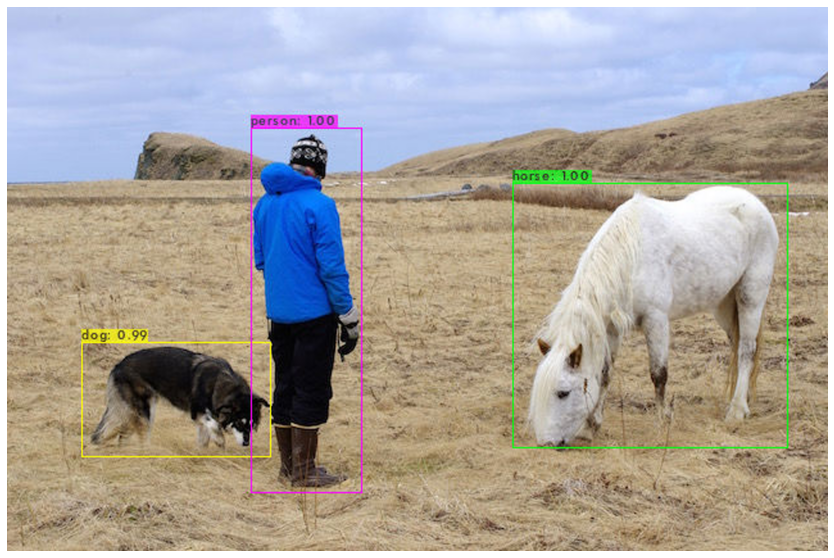

In [ ]:
!./darknet detect cfg/yolov4.cfg weights/yolov4.weights data/dog.jpg
imShow('predictions.jpg')